In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

Matplotlib is building the font cache; this may take a moment.


In [3]:
def doubleFan(t = 10):
    G = nx.DiGraph()
    G.add_nodes_from(['s', 't'])
    G.add_nodes_from(['a' + str(x) for x in range(t)])
    G.add_nodes_from(['b' + str(x) for x in range(t)])
    G.add_nodes_from(['x', 'y'])
    G.add_edges_from([('s', 'a' + str(x)) for x in range(t)])
    G.add_edges_from([('a' + str(x), 'x') for x in range(t)])
    G.add_edge('x', 'y')
    G.add_edges_from([('y', 'b' + str(x)) for x in range(t)])
    G.add_edges_from([('b' + str(x), 't') for x in range(t)])
    return G

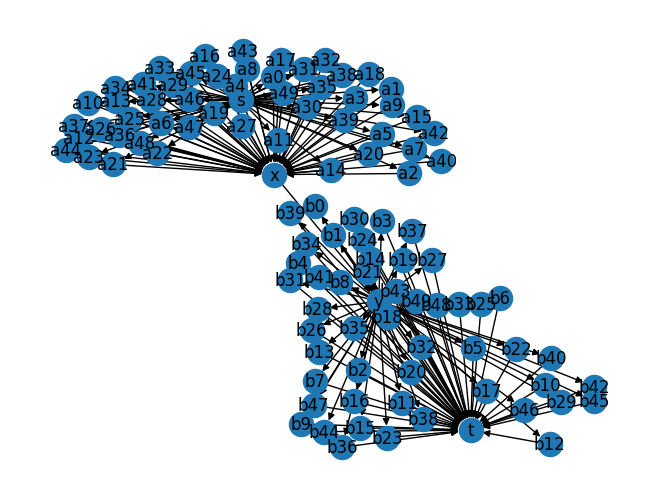

In [4]:
nx.draw(doubleFan(50), with_labels=True)

In [5]:
def pricingDisjointPaths(G_original, sourceTargetPairs, c = 1):
    G = G_original.copy()
    result = []
    beta = math.pow(G.number_of_edges(), 1 / (c+1))
    # Initialize 
    for u, v, d in G.edges(data=True):
        d['length'] = 1
        d['congestion'] = 0
    # Main cycle
    while True:
        ####
        minPath = None
        for index in range(len(sourceTargetPairs)):
            try:
                s = sourceTargetPairs[index][0]
                t = sourceTargetPairs[index][1]
                path = nx.dijkstra_path(G, s, t, weight='length')
            except:
                pass
            else:
                pathLength = 0
                for i in range(0, len(path) - 1):
                    pathLength += G[path[i]][path[i+1]]['length']
                if minPath is None or pathLength < minPathLength:
                    minPath = path
                    minPathLength = pathLength
                    minIndex = index
        ####
        if minPath is None:
            break
        for i in range(0, len(minPath) - 1):
            if G[path[i]][path[i+1]]['congestion'] == c - 1:
                G.remove_edge(path[i], path[i+1])
            else:
                G[path[i]][path[i+1]]['congestion'] += 1
                G[path[i]][path[i+1]]['length'] *= beta
        result.append(minPath)
        sourceTargetPairs.pop(minIndex)
    return result

In [6]:
pricingDisjointPaths(doubleFan(5), [('s', 't')]*11, c=10)

[['s', 'a0', 'x', 'y', 'b0', 't'],
 ['s', 'a1', 'x', 'y', 'b1', 't'],
 ['s', 'a2', 'x', 'y', 'b2', 't'],
 ['s', 'a3', 'x', 'y', 'b3', 't'],
 ['s', 'a4', 'x', 'y', 'b4', 't'],
 ['s', 'a0', 'x', 'y', 'b0', 't'],
 ['s', 'a1', 'x', 'y', 'b1', 't'],
 ['s', 'a2', 'x', 'y', 'b2', 't'],
 ['s', 'a3', 'x', 'y', 'b3', 't'],
 ['s', 'a4', 'x', 'y', 'b4', 't']]